### Importing Datasets

In [1]:
import pandas as pd
from sklearn import preprocessing as pre
traind=pd.read_csv("C:/Users/Dell/Downloads/archive (2)/sign_mnist_train.csv")
testd=pd.read_csv("C:/Users/Dell/Downloads/archive (2)/sign_mnist_test.csv")

In [2]:
traind.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
testd.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [5]:
#Seperating label column from dataset
X_traind = traind.drop(columns=['label'])
y_traind = traind['label']
X_testd = testd.drop(columns=['label'])
y_testd = testd['label']
labels = traind['label'].values
labels1 = testd['label'].values

### Preprocessing 

In [6]:
X_traind.dropna()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [7]:
X_traind.isnull().sum() #checking for null values

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64

In [8]:
print(X_traind.count()) #counting number of values

pixel1      27455
pixel2      27455
pixel3      27455
pixel4      27455
pixel5      27455
            ...  
pixel780    27455
pixel781    27455
pixel782    27455
pixel783    27455
pixel784    27455
Length: 784, dtype: int64


## Before grayscale

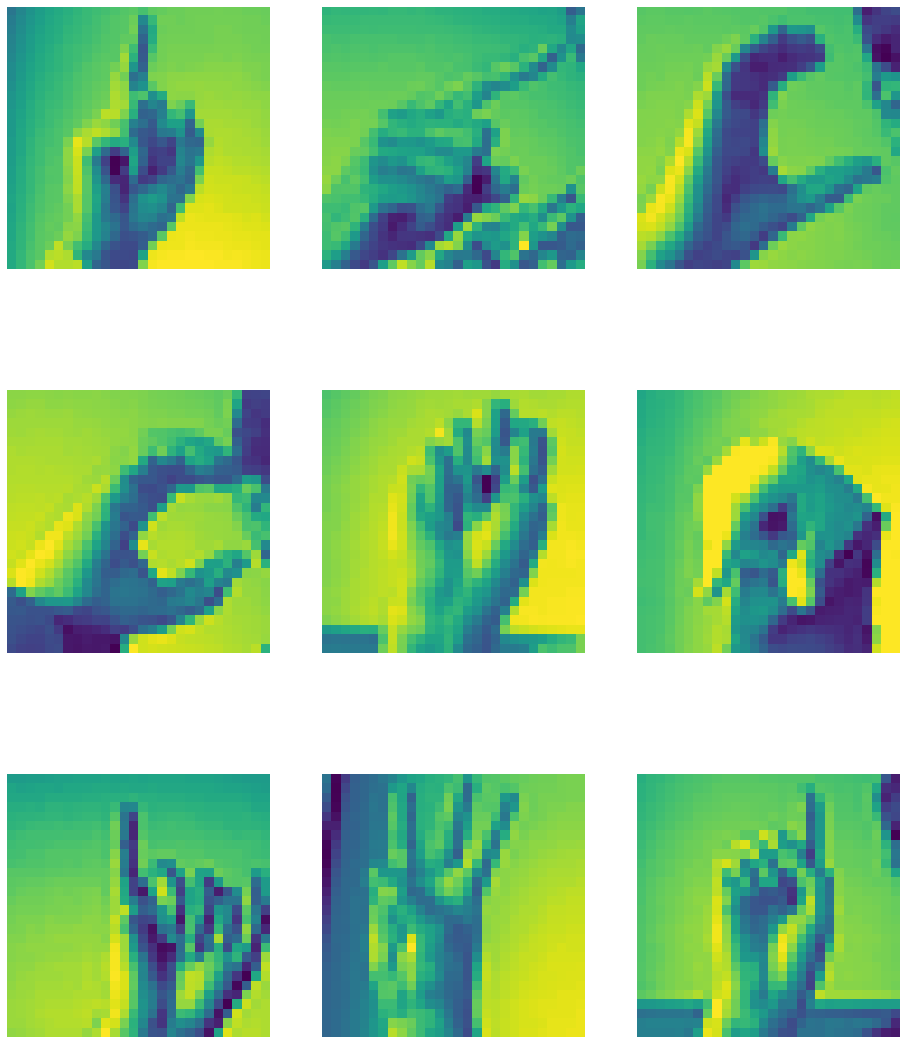

In [9]:
import matplotlib.pyplot as plt
k = 0
row, col = 3,3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img = X_traind.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].imshow(img)
        ax[i,j].axis("off")
        k += 1
plt.show()

### After grayscale 

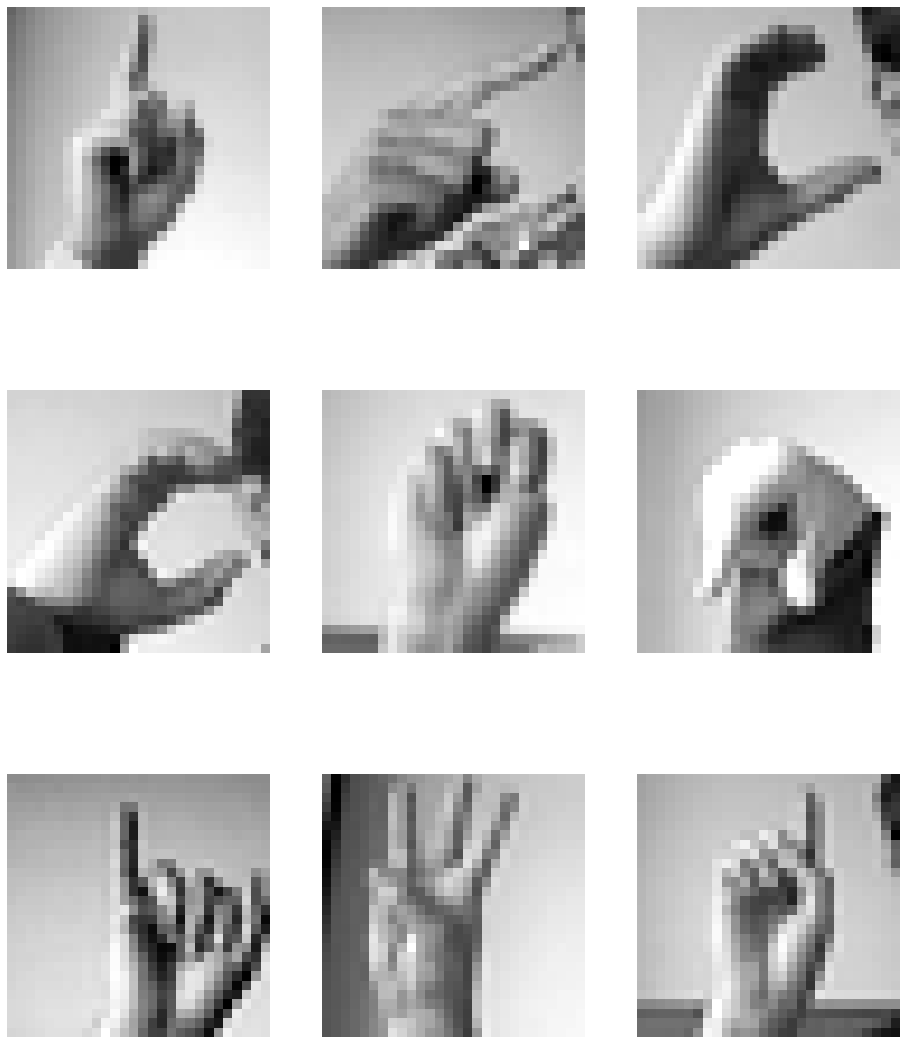

In [10]:
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img1 = X_traind.iloc[k].to_numpy()
        img1 = img1.reshape((28,28))
        ax[i,j].imshow(img1, cmap ='gray')
        ax[i,j].axis("off")
        k += 1
plt.show()
fig.savefig("Grayscale-Hand signs")

### Normalization

In [11]:
X_traindN=X_traind/255
X_testdN=X_testd/255
y_traindN= np_utils.to_categorical(y_traind)
y_testdN= np_utils.to_categorical(y_testd)

In [12]:
X_traindN

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,0.741176,0.741176,0.745098,0.745098,0.752941,0.756863,0.756863,0.756863,0.756863,0.760784,...,0.517647,0.647059,0.388235,0.301961,0.203922,0.784314,0.917647,0.784314,0.870588,0.882353
27451,0.592157,0.603922,0.615686,0.619608,0.627451,0.631373,0.639216,0.643137,0.650980,0.654902,...,0.776471,0.776471,0.776471,0.776471,0.776471,0.768627,0.764706,0.764706,0.764706,0.760784
27452,0.682353,0.682353,0.682353,0.682353,0.682353,0.686275,0.686275,0.682353,0.678431,0.678431,...,0.474510,0.768627,0.819608,0.815686,0.807843,0.800000,0.796078,0.792157,0.784314,0.784314
27453,0.694118,0.709804,0.721569,0.725490,0.733333,0.741176,0.745098,0.749020,0.749020,0.745098,...,0.466667,0.219608,0.105882,0.227451,0.400000,0.309804,0.184314,0.250980,0.341176,0.364706


In [13]:
num_classes=y_traindN.shape[1]
print(num_classes)

25


### Test data after Normalization

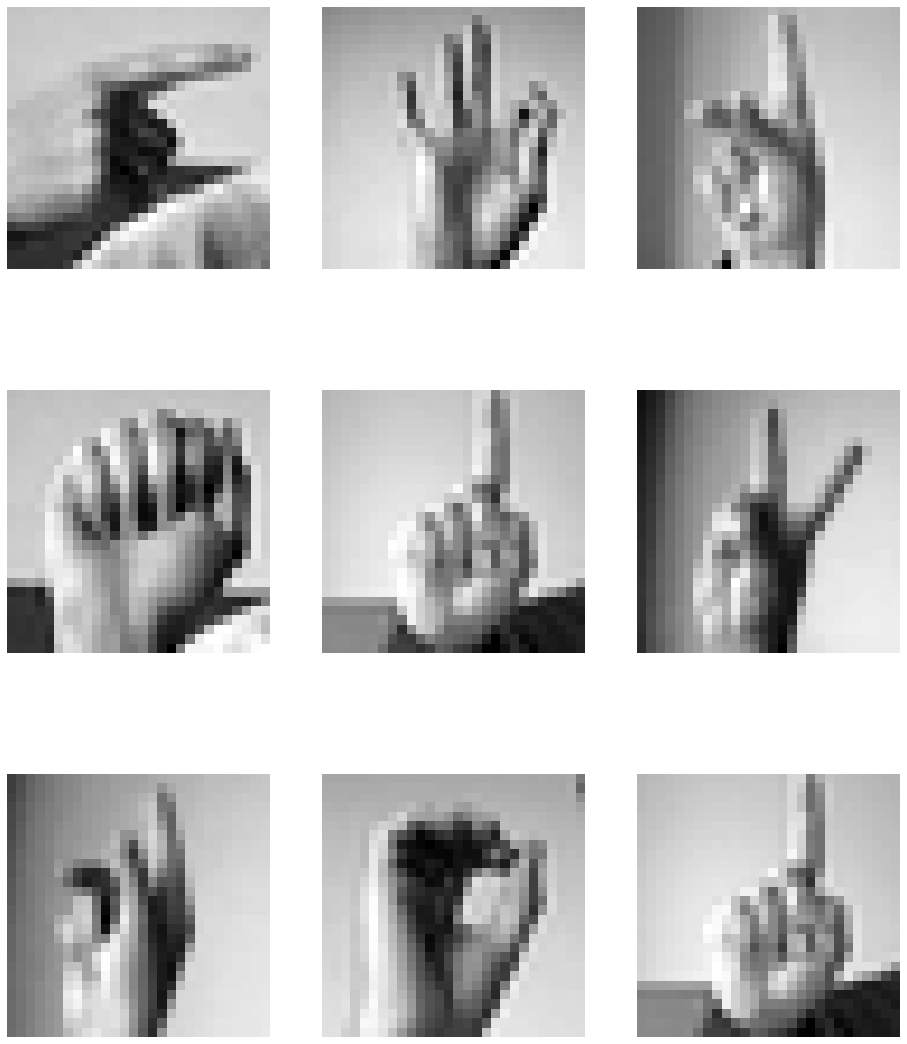

In [14]:
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img1 = X_testdN.iloc[k].to_numpy()
        img1 = img1.reshape((28,28))
        ax[i,j].imshow(img1, cmap ='gray')
        ax[i,j].axis("off")
        k += 1
plt.show()

### Traindata after Normalization

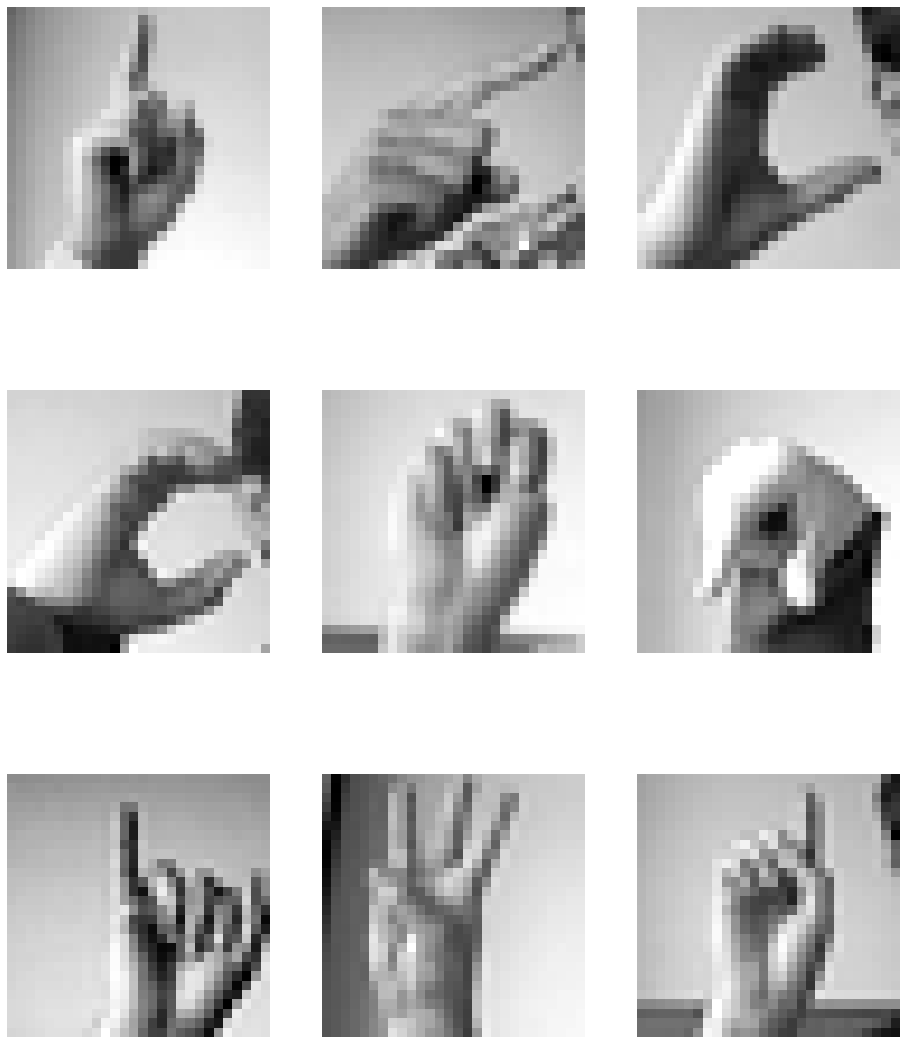

In [15]:
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img1 = X_traindN.iloc[k].to_numpy()
        img1 = img1.reshape((28,28))
        ax[i,j].imshow(img1, cmap ='gray')
        ax[i,j].axis("off")
        k += 1
plt.show()

### Histogram Equalization

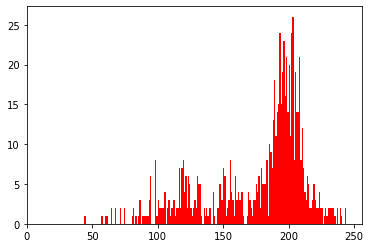

In [16]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

### Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

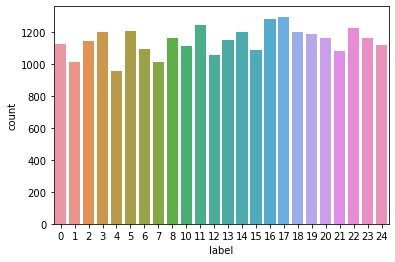

In [17]:
import seaborn as sns
sns.countplot(x='label',data= traind)

### Splitting of data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = X_traindN.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])


# hot one encode our Labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [20]:
label_binrizer = LabelBinarizer()
y_test = label_binrizer.fit_transform(labels1)

In [21]:
len(y_testdN[0])

25

In [22]:
X1_train, X1_Val, Y1_train, Y1_Val = train_test_split(images,labels, test_size=0.2, random_state=1)

In [23]:
X1_Val.shape

(5491, 784)

In [24]:
X1_train.shape

(21964, 784)

In [25]:
display(X1_train.shape)

(21964, 784)

In [26]:
X_test = X_testdN.values
X_test = np.array([np.reshape(i, (28, 28)) for i in  X_test])
X_test = np.array([i.flatten() for i in  X_test])

In [27]:
labels1

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

### Reshape

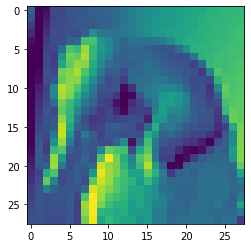

In [28]:
# Reshape them into the size required by TF and Keras
X1_train = X1_train.reshape(X1_train.shape[0], 28, 28, 1)
X1_Val = X1_Val.reshape(X1_Val.shape[0], 28, 28, 1)

plt.imshow(X1_train[2].reshape(28,28))

In [29]:
X1_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### CNN

In [30]:
training_iters = 10
learning_rate = 0.001
epochs =10

In [31]:
img.shape

(28, 28)

In [32]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K

from tensorflow.keras.optimizers import Adam

model = Sequential ()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout (0.20))

model.add(Dense(24, activation = 'softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [34]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

C:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
history = model.fit(X1_train,Y1_train, validation_data= (X1_Val,Y1_Val),epochs=epochs , batch_size=128)

Epoch 1/10
172/172 [==============================] - 27s 149ms/step - loss: 2.4537 - acc: 0.2399 - val_loss: 1.2699 - val_acc: 0.6261
Epoch 2/10
172/172 [==============================] - 24s 138ms/step - loss: 1.0391 - acc: 0.6539 - val_loss: 0.6625 - val_acc: 0.7926
Epoch 3/10
172/172 [==============================] - 25s 143ms/step - loss: 0.6409 - acc: 0.7827 - val_loss: 0.4222 - val_acc: 0.8703
Epoch 4/10
172/172 [==============================] - 26s 150ms/step - loss: 0.4147 - acc: 0.8629 - val_loss: 0.2376 - val_acc: 0.9366
Epoch 5/10
172/172 [==============================] - 23s 134ms/step - loss: 0.2799 - acc: 0.9079 - val_loss: 0.1423 - val_acc: 0.9667
Epoch 6/10
172/172 [==============================] - 22s 127ms/step - loss: 0.1976 - acc: 0.9368 - val_loss: 0.0948 - val_acc: 0.9847
Epoch 7/10
172/172 [==============================] - 22s 127ms/step - loss: 0.1318 - acc: 0.9615 - val_loss: 0.0677 - val_acc: 0.9843
Epoch 8/10
172/172 [==============================] - 2

In [36]:
print("Accuracy of the model is - " , model.evaluate(X1_test,y_test)[1]*100 , "%")

225/225 [==============================] - 3s 12ms/step - loss: 0.4705 - acc: 0.8774
Accuracy of the model is -  87.74400353431702 %


In [37]:
model1 = Sequential ()
model1.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))

model1.add(MaxPooling2D(pool_size = (2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout (0.20))

model1.add(Dense(24, activation = 'softmax'))

In [38]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)        

In [39]:

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [40]:
history1 = model1.fit(X1_train,Y1_train, validation_data= (X1_Val,Y1_Val),epochs=epochs , batch_size=128)

Epoch 1/10
172/172 [==============================] - 32s 176ms/step - loss: 1.1355 - acc: 0.6672 - val_loss: 3.1103 - val_acc: 0.0993
Epoch 2/10
172/172 [==============================] - 26s 152ms/step - loss: 0.1331 - acc: 0.9627 - val_loss: 2.0947 - val_acc: 0.5904
Epoch 3/10
172/172 [==============================] - 26s 152ms/step - loss: 0.0475 - acc: 0.9878 - val_loss: 0.8081 - val_acc: 0.8412
Epoch 4/10
172/172 [==============================] - 26s 153ms/step - loss: 0.0217 - acc: 0.9952 - val_loss: 0.0774 - val_acc: 0.9825
Epoch 5/10
172/172 [==============================] - 27s 156ms/step - loss: 0.0158 - acc: 0.9964 - val_loss: 0.0884 - val_acc: 0.9718
Epoch 6/10
172/172 [==============================] - 44s 257ms/step - loss: 0.0117 - acc: 0.9974 - val_loss: 0.0220 - val_acc: 0.9927
Epoch 7/10
172/172 [==============================] - 188s 1s/step - loss: 0.0142 - acc: 0.9962 - val_loss: 0.1628 - val_acc: 0.9368
Epoch 8/10
172/172 [==============================] - 31s

In [41]:
print("Accuracy of the model is - " , model1.evaluate(X1_test,y_test)[1]*100 , "%")

225/225 [==============================] - 3s 12ms/step - loss: 0.6077 - acc: 0.8487
Accuracy of the model is -  84.8717212677002 %


In [42]:
 
model2= Sequential ()
model2.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))

model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Flatten())

model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout (0.20))

model2.add(Dense(24, activation = 'softmax'))

In [43]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 dropout_3 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)        

In [44]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam,Adammax
adam=Adam(lr=0.001)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

ImportError: cannot import name 'Adammax' from 'tensorflow.keras.optimizers' (C:\Users\Dell\anaconda3\lib\site-packages\keras\api\_v2\keras\optimizers\__init__.py)

In [ ]:
 history2 = model2.fit(X1_train,Y1_train, validation_data= (X1_Val,Y1_Val),epochs=epochs , batch_size=128)

In [ ]:
print("Accuracy of the model is - " , model2.evaluate(X1_test,y_test)[1]*100 , "%")

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history1.history['acc']
train_loss = history1.history['loss']
val_acc = history1.history['val_acc']
val_loss = history1.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
model3 = Sequential ()
model3.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))

model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Flatten())

model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout (0.20))

model3.add(Dense(24, activation = 'softmax'))

In [ ]:
#from tensorflow.keras.optimizers import RMSprop,SGD,Adam
rms_prop = RMSprop(lr=0.0001, rho=0.8, epsilon=1e-6, decay=1e-2)
model3.compile(optimizer=rms_prop,loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
#model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
history3 = model3.fit(X1_train,Y1_train, validation_data= (X1_Val,Y1_Val), epochs=10 , batch_size=128)

In [ ]:
print("Accuracy of the model is - " , model3.evaluate(X1_test,y_test)[1]*100 , "%")

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam,Adagrad
ada_grad=Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07)
model3.compile(optimizer=ada_grad,loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history4 = model3.fit(X1_train,Y1_train, validation_data= (X1_Val,Y1_Val), epochs=10 , batch_size=128)

In [ ]:
print("Accuracy of the model is - " , model3.evaluate(X1_test,y_test)[1]*100 , "%")